<a href="https://colab.research.google.com/github/prikmm/Stock_predictor/blob/main/Stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goal is to predict the price of IBM stock for year 2017!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
import os
import time
!pip install ta
import ta
import warnings
warnings.filterwarnings('ignore')
import tensorflow_datasets as tfds
!pip install tensorflow-addons
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=75ddd5f47fd8da929f7c50a3efad139b0460d9a368a87f3f9e7c9032dd22a1e4
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.3 MB/s 


In [2]:
complete_stock_df = pd.read_csv('MSFT.csv')
complete_stock_df.head()

,date,Open,High,Low,closing_price,Adj Close,Volume
0,13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


In [3]:
complete_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9165 non-null   object 
 1   Open           9165 non-null   float64
 2   High           9165 non-null   float64
 3   Low            9165 non-null   float64
 4   closing_price  9165 non-null   float64
 5   Adj Close      9165 non-null   float64
 6   Volume         9165 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 501.3+ KB


In [4]:
stock = complete_stock_df.set_index(["date"])
stock

,Open,High,Low,closing_price,Adj Close,Volume
date,,,,,,
13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
18/07/2022,259.750000,260.839996,253.300003,254.250000,254.250000,20975000
19/07/2022,257.579987,259.720001,253.679993,259.529999,259.529999,25012600
20/07/2022,259.899994,264.869995,258.910004,262.269989,262.269989,22788300


### Creating Train, Valid and Test datasets from IBM data:

In [5]:
#temp_ibm_df = ibm_df.reset_index()
#masker = temp_ibm_df['date'].str.split('/').str[0].astype(int)
training_set = stock.iloc[:-100]
test_set = stock.iloc[-100:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(training_set)
training_set_scaled = scaler.transform(training_set)
testing_set_scaled = scaler.transform(test_set)

In [7]:
timesteps = 8
# First, we create data sets where each sample has with 8 timesteps and 1 output
# So for each element of training set, we have 8 previous training set elements 
x_train = []
y_train = []
for i in range(timesteps,training_set.shape[0]):
    x_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train[0], y_train[0])
print(x_train[1], y_train[1])

[0.00000000e+00 2.51936359e-05 3.52710903e-05 4.03127200e-05
 3.27517267e-05 2.77129995e-05 2.01549088e-05 1.25968180e-05] 5.0387271898801045e-06
[2.51936359e-05 3.52710903e-05 4.03127200e-05 3.27517267e-05
 2.77129995e-05 2.01549088e-05 1.25968180e-05 5.03872719e-06] 1.0077454379760209e-05


In [8]:
print(x_train.shape, y_train.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(9057, 8) (9057,)
(9057, 8, 1) (9057,)


In [ ]:
#Build the model

In [9]:
from tensorflow.keras import layers
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    
    # Normalization and Attention
    # "EMBEDDING LAYER"
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    
    # "ATTENTION LAYER"
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    
    # FEED FORWARD Part - you can stick anything here or just delete the whole section - it will still work. 
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

#Building Model

In [10]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks):  # This is what stacks our transformer blocks
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x) #this is a pass-through
    return keras.Model(inputs, outputs)

In [11]:
def lr_scheduler(epoch, lr, warmup_epochs=30, decay_epochs=100, initial_lr=1e-6, base_lr=1e-3, min_lr=5e-5):
    if epoch <= warmup_epochs:
        pct = epoch / warmup_epochs
        return ((base_lr - initial_lr) * pct) + initial_lr

    if epoch > warmup_epochs and epoch < warmup_epochs+decay_epochs:
        pct = 1 - ((epoch - warmup_epochs) / decay_epochs)
        return ((base_lr - min_lr) * pct) + min_lr

    return min_lr

In [12]:
callbacks = [
            keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.LearningRateScheduler(lr_scheduler)
            ]

In [13]:
input_shape = x_train.shape[1:]
print(input_shape)

(8, 1)


In [14]:
model = build_model(
    input_shape,
    head_size=46, # Embedding size for attention
    num_heads=60, # Number of attention heads
    ff_dim=55, # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.4,
    dropout=0.14,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)
#model.summary()


history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=20,
    callbacks=callbacks,
)

Epoch 1/100
363/363 [==============================] - 58s 144ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.1796 - val_mean_squared_error: 0.1796 - lr: 1.0000e-06
Epoch 2/100
363/363 [==============================] - 48s 133ms/step - loss: 7.7084e-04 - mean_squared_error: 7.7084e-04 - val_loss: 0.0063 - val_mean_squared_error: 0.0063 - lr: 3.4300e-05
Epoch 3/100
363/363 [==============================] - 48s 133ms/step - loss: 1.9278e-04 - mean_squared_error: 1.9278e-04 - val_loss: 8.4353e-04 - val_mean_squared_error: 8.4353e-04 - lr: 6.7600e-05
Epoch 4/100
363/363 [==============================] - 49s 136ms/step - loss: 1.8277e-04 - mean_squared_error: 1.8277e-04 - val_loss: 9.8918e-04 - val_mean_squared_error: 9.8918e-04 - lr: 1.0090e-04
Epoch 5/100
363/363 [==============================] - 49s 136ms/step - loss: 1.7202e-04 - mean_squared_error: 1.7202e-04 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - lr: 1.3420e-04
Epoch 6/100
363/363 [================

In [15]:
!pip install yahoofinancials
#from yahoofinancials import YahooFinancials
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sqlite3
import pandas as pd
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime

#For reproducability
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# Some functions to help out with
def plot_predictions(test,predicted,symbol):
    plt.plot(test, color='red',label=f'Real {symbol} Stock Price')
    plt.plot(predicted, color='blue',label=f'Predicted {symbol} Stock Price')
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{symbol} Stock Price')
    plt.legend()
    plt.show()

def plot_return_predictions(test,predicted,symbol):
    plt.plot(test, color='red',label=f'Real {symbol} Stock Price Returns')
    plt.plot(predicted, color='blue',label=f'Predicted {symbol} Stock Price Return')
    plt.title(f'{symbol} Stock Return Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{symbol} Stock Price Returns')
    plt.legend()
    plt.show()
    
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=cbe2e5a3f53c86545041376e64c2a39df14f766639472468a7256effcb60e6b7
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


Evaluate model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement plot_predictions (from versions: none)
ERROR: No matching distribution found for plot_predictions


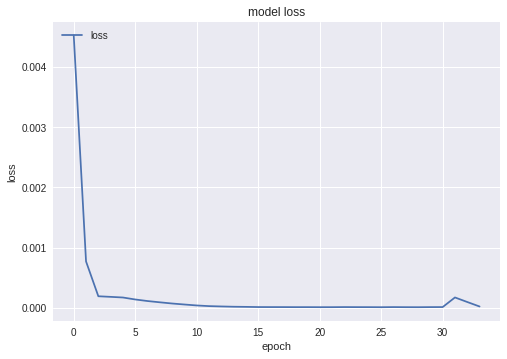

(100, 1, 1)

In [16]:
# First we have to frontload the test data before the inital values of our test_set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
!pip install plot_predictions

from math import sqrt
#dataset_total = pd.concat((stock[target][:train_end_date],stock[target][test_start_date:]),axis=0)
inputs = stock[len(x_train)-len(test_set) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)

X_test = []
for i in range(timesteps,test_set.shape[0] + timesteps):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price1 = scaler.inverse_transform(predicted_stock_price)


#print(test_set[-3],test_set[-2], test_set[-1])
#shifted_test_set = shift(test_set, 1) #The shift function is defined early in the notebook
#print(shifted_test_set[-3],shifted_test_set[-2], shifted_test_set[-1])

#print(predicted_stock_price[-1])
prediction_error = test_set - predicted_stock_price # This is the error on the same day
#Before we can calculate the predicted return we have to shift the test_set to the day before so we use the shifted_test_set
predicted_return = (test_set - predicted_stock_price) / test_set

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

#plot_predictions(test_set,predicted_stock_price)
#rmse=(test_set,predicted_stock_price)
#print(rmse)
test_set1=test_set.iloc[:,3:4]
test_set1.shape

X_test1=X_test[:,3:4]
X_test1.shape

#plot_predictions(test_set,predicted_stock_price,original_symbol)
#return_rmse(X_test1,predicted_stock_price)
#plot_return_predictions(test_set_return,predicted_return)
#rmse=(test_set_return[1:], predicted_return[1:])


In [17]:
test_set1.shape

(100, 1)

In [18]:
predicted_return.shape

(100, 6)

In [19]:
prediction_error

,Open,High,Low,closing_price,Adj Close,Volume
date,,,,,,
1/03/2022,296.387547,299.957554,292.137547,294.937565,294.252201,3.121780e+07
2/03/2022,295.347907,301.457923,293.687934,300.177924,299.480384,3.187300e+07
3/03/2022,302.888139,303.128129,294.048112,295.918137,295.230515,2.731450e+07
4/03/2022,294.288833,295.658828,287.168837,289.858809,289.185256,3.235650e+07
7/03/2022,288.337810,289.497813,278.337810,278.717815,278.069713,4.315720e+07
...,...,...,...,...,...,...
18/07/2022,259.669627,260.759623,253.219630,254.169627,254.169627,2.097500e+07
19/07/2022,257.563755,259.703769,253.663761,259.513767,259.513767,2.501260e+07
20/07/2022,259.884228,264.854229,258.894238,262.254223,262.254223,2.278830e+07


In [20]:
prediction_error=prediction_error.iloc[:,3:4]

In [21]:
abs(prediction_error)

,closing_price
date,
1/03/2022,294.937565
2/03/2022,300.177924
3/03/2022,295.918137
4/03/2022,289.858809
7/03/2022,278.717815
...,...
18/07/2022,254.169627
19/07/2022,259.513767
20/07/2022,262.254223


In [22]:
X_test1

array([[[6.44486106e-07]],

       [[6.23930045e-07]],

       [[2.41661868e-01]],

       [[6.82858908e-07]],

       [[7.05639264e-07]],

       [[6.66934720e-07]],

       [[7.00110043e-07]],

       [[6.79209092e-07]],

       [[3.13573805e-01]],

       [[6.88388129e-07]],

       [[7.05528580e-07]],

       [[6.55212805e-07]],

       [[7.04533353e-07]],

       [[6.83605065e-07]],

       [[2.16198701e-01]],

       [[6.92922123e-07]],

       [[6.96571265e-07]],

       [[6.41610801e-07]],

       [[6.45370627e-07]],

       [[6.24809180e-07]],

       [[4.57512687e-01]],

       [[6.06223656e-07]],

       [[6.32653486e-07]],

       [[5.30915694e-07]],

       [[5.83775032e-07]],

       [[5.63595268e-07]],

       [[4.23300081e-01]],

       [[5.99146420e-07]],

       [[6.19604614e-07]],

       [[5.81231801e-07]],

       [[5.89304253e-07]],

       [[5.69090395e-07]],

       [[2.47309413e-01]],

       [[6.10647298e-07]],

       [[6.49241147e-07]],

       [[5.86097548e

In [23]:
X_test

array([[[6.41942543e-07],
        [6.62179678e-07],
        [6.25797307e-07],
        [6.44486106e-07],
        [6.23930045e-07],
        [2.41661868e-01],
        [6.82858908e-07],
        [7.05639264e-07]],

       [[6.62179678e-07],
        [6.25797307e-07],
        [6.44486106e-07],
        [6.23930045e-07],
        [2.41661868e-01],
        [6.82858908e-07],
        [7.05639264e-07],
        [6.66934720e-07]],

       [[6.25797307e-07],
        [6.44486106e-07],
        [6.23930045e-07],
        [2.41661868e-01],
        [6.82858908e-07],
        [7.05639264e-07],
        [6.66934720e-07],
        [7.00110043e-07]],

       [[6.44486106e-07],
        [6.23930045e-07],
        [2.41661868e-01],
        [6.82858908e-07],
        [7.05639264e-07],
        [6.66934720e-07],
        [7.00110043e-07],
        [6.79209092e-07]],

       [[6.23930045e-07],
        [2.41661868e-01],
        [6.82858908e-07],
        [7.05639264e-07],
        [6.66934720e-07],
        [7.00110043e-07],
    

In [24]:
X_test1.shape

(100, 1, 1)

In [25]:
predicted_stock_price

array([[0.01244723],
       [0.01207843],
       [0.00187564],
       [0.00117644],
       [0.19218871],
       [0.08228341],
       [0.01644916],
       [0.0159773 ],
       [0.00273105],
       [0.00180742],
       [0.13529181],
       [0.05328084],
       [0.01102474],
       [0.01069312],
       [0.00156648],
       [0.00094569],
       [0.27709302],
       [0.12312552],
       [0.02438622],
       [0.02372037],
       [0.00436215],
       [0.00297711],
       [0.26103148],
       [0.10771534],
       [0.02250873],
       [0.02188741],
       [0.00398418],
       [0.0027103 ],
       [0.15578108],
       [0.05946552],
       [0.01276225],
       [0.01238527],
       [0.00194367],
       [0.00122702],
       [0.18088454],
       [0.07678279],
       [0.01538657],
       [0.01494181],
       [0.00250589],
       [0.00164234],
       [0.1286835 ],
       [0.05077569],
       [0.01043931],
       [0.01012312],
       [0.00143854],
       [0.00084973],
       [0.10312177],
       [0.041

In [26]:
predicted_stock_price.shape

(100, 1)

In [27]:
predicted_stock_price1

array([[ 1125828.2  ],
       [ 1092477.5  ],
       [  169852.69 ],
       [  106625.664],
       [17379608.   ],
       [ 7441019.5  ],
       [ 1487717.1  ],
       [ 1445047.4  ],
       [  247206.48 ],
       [  163684.2  ],
       [12234499.   ],
       [ 4818356.   ],
       [  997194.3  ],
       [  967206.2  ],
       [  141896.27 ],
       [   85758.74 ],
       [25057392.   ],
       [11134317.   ],
       [ 2205454.2  ],
       [ 2145242.5  ],
       [  394704.62 ],
       [  269457.28 ],
       [23604968.   ],
       [ 9740795.   ],
       [ 2035675.5  ],
       [ 1979490.8  ],
       [  360525.8  ],
       [  245330.44 ],
       [14087315.   ],
       [ 5377629.   ],
       [ 1154314.9  ],
       [ 1120224.6  ],
       [  176005.33 ],
       [  111199.055],
       [16357388.   ],
       [ 6943605.5  ],
       [ 1391628.8  ],
       [ 1351409.1  ],
       [  226846.22 ],
       [  148755.67 ],
       [11636918.   ],
       [ 4591819.   ],
       [  944254.4  ],
       [  9

In [30]:
predicted_stock_price2 = predicted_stock_price.reshape(100,1,1)
predicted_stock_price2

array([[[0.01244723]],

       [[0.01207843]],

       [[0.00187564]],

       [[0.00117644]],

       [[0.19218871]],

       [[0.08228341]],

       [[0.01644916]],

       [[0.0159773 ]],

       [[0.00273105]],

       [[0.00180742]],

       [[0.13529181]],

       [[0.05328084]],

       [[0.01102474]],

       [[0.01069312]],

       [[0.00156648]],

       [[0.00094569]],

       [[0.27709302]],

       [[0.12312552]],

       [[0.02438622]],

       [[0.02372037]],

       [[0.00436215]],

       [[0.00297711]],

       [[0.26103148]],

       [[0.10771534]],

       [[0.02250873]],

       [[0.02188741]],

       [[0.00398418]],

       [[0.0027103 ]],

       [[0.15578108]],

       [[0.05946552]],

       [[0.01276225]],

       [[0.01238527]],

       [[0.00194367]],

       [[0.00122702]],

       [[0.18088454]],

       [[0.07678279]],

       [[0.01538657]],

       [[0.01494181]],

       [[0.00250589]],

       [[0.00164234]],

       [[0.1286835 ]],

       [[0.05077

In [49]:
test_set1

,closing_price,Predicted Closing Price,Actual Price
date,,,
1/03/2022,294.950012,0.012447,6.444861e-07
2/03/2022,300.190002,0.012078,6.239300e-07
3/03/2022,295.920013,0.001876,2.416619e-01
4/03/2022,289.859985,0.001176,6.828589e-07
7/03/2022,278.910004,0.192189,7.056393e-07
...,...,...,...
18/07/2022,254.250000,0.080373,4.865716e-07
19/07/2022,259.529999,0.016232,5.706155e-07
20/07/2022,262.269989,0.015766,5.505174e-07


In [32]:
X_test2=X_test1.reshape(100,1)
X_test2

array([[6.44486106e-07],
       [6.23930045e-07],
       [2.41661868e-01],
       [6.82858908e-07],
       [7.05639264e-07],
       [6.66934720e-07],
       [7.00110043e-07],
       [6.79209092e-07],
       [3.13573805e-01],
       [6.88388129e-07],
       [7.05528580e-07],
       [6.55212805e-07],
       [7.04533353e-07],
       [6.83605065e-07],
       [2.16198701e-01],
       [6.92922123e-07],
       [6.96571265e-07],
       [6.41610801e-07],
       [6.45370627e-07],
       [6.24809180e-07],
       [4.57512687e-01],
       [6.06223656e-07],
       [6.32653486e-07],
       [5.30915694e-07],
       [5.83775032e-07],
       [5.63595268e-07],
       [4.23300081e-01],
       [5.99146420e-07],
       [6.19604614e-07],
       [5.81231801e-07],
       [5.89304253e-07],
       [5.69090395e-07],
       [2.47309413e-01],
       [6.10647298e-07],
       [6.49241147e-07],
       [5.86097548e-07],
       [6.31105149e-07],
       [6.10632115e-07],
       [2.94442701e-01],
       [6.34091138e-07],


In [33]:
rmse= np.sqrt(mean_squared_error(X_test2,predicted_stock_price))
print("RMSE for  =", rmse)
print("MSE for  =", mean_squared_error(X_test2,predicted_stock_price))
print("RMSE for  =", mean_squared_error(X_test2,predicted_stock_price) ** 0.5)
print("MAE for  =", mean_absolute_error(X_test2,predicted_stock_price))

RMSE for  = 0.15624147509538938
MSE for  = 0.02441139853998318
RMSE for  = 0.15624147509538938
MAE for  = 0.10087957999141177


In [44]:
test_set1["Predicted Closing Price"]  = predicted_stock_price

In [48]:
test_set1["Actual Price"]  = X_test2

In [59]:
newset = test_set1.drop(labels=['closing_price'], axis=1)

In [60]:
newset

,Predicted Closing Price,Actual Price
date,,
1/03/2022,0.012447,6.444861e-07
2/03/2022,0.012078,6.239300e-07
3/03/2022,0.001876,2.416619e-01
4/03/2022,0.001176,6.828589e-07
7/03/2022,0.192189,7.056393e-07
...,...,...
18/07/2022,0.080373,4.865716e-07
19/07/2022,0.016232,5.706155e-07
20/07/2022,0.015766,5.505174e-07


<Figure size 2400x800 with 0 Axes>

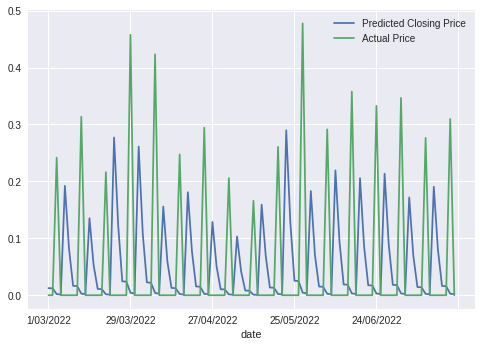

In [61]:
#s = pd.Series(predicted_stock_price, index =df2.index[-100:])
#s
plt.figure(figsize=(30,10), dpi=80)
#test_set1.plot(label='Actual Stock Price', legend=True)
newset.plot(label='Actual Stock Price', legend=True)
#X_test2.plot(label='Actual Stock Price', legend=True)
#predicted_stock_price.plot(label='Predicted Price', legend=True,)